Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Georgios Evangelos Margaritis"
COLLABORATORS = ""

---

# CSC_51073_EP Lab1 : Light, color and images


In this first lab, the goal is to manipulate images and its pixel colors.
Let us first import the necessary python libraries

In [2]:
import numpy as np # grey images are stored in memory as 2D arrays, color images as 3D arrays
import cv2 as cv # opencv computer vision library
from skimage import io # for io.imread
from matplotlib import pyplot as plt # ploting

def imshow(image, cmap=None):
  plt.imshow(image, cmap)
  plt.show()

# interactive notebook widgets
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Read first an image using `io.imread`  and display it using `imshow`.

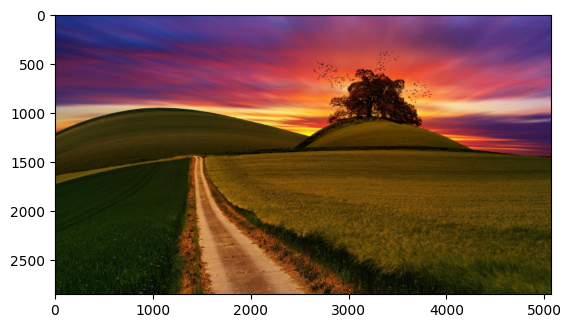

In [3]:
url = 'landscape.jpg' # put the url of any color image here
imageRGB = io.imread(url)
imshow(imageRGB)
# YOUR CODE HERE

What is the size of this image ? print the `shape` of the image. Note that this is a 3D array (height, width and number of color channels)

In [4]:
print(imageRGB.shape)
# YOUR CODE HERE

(2850, 5068, 3)


Colors should displayed as you expected: `io.imread` from scikit-image lays out image data in **RGB order**, meaning red is in channel 0 (indices `[:,:,0]`), green is in channel 1 (indices `[:,:,1]`), and blue is in channel 2 (indices `[:,:,2]`).

Note: This is different from OpenCV's `cv2.imread` which uses BGR order.

Now, extract the 3 color channels and display them side by side.

**Hints:** use `cmap='gray'` or create a copy for each of the channels (red, green, blue) and overwrite all values with zeros (e.g.: set green=blue=0 for the "red" copy)

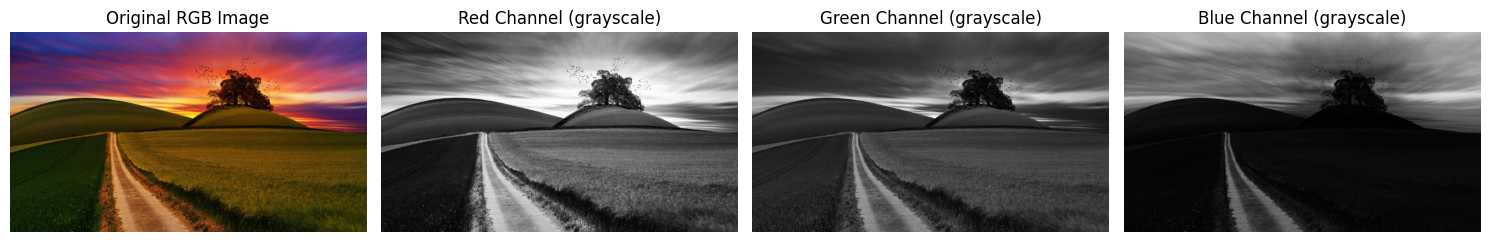

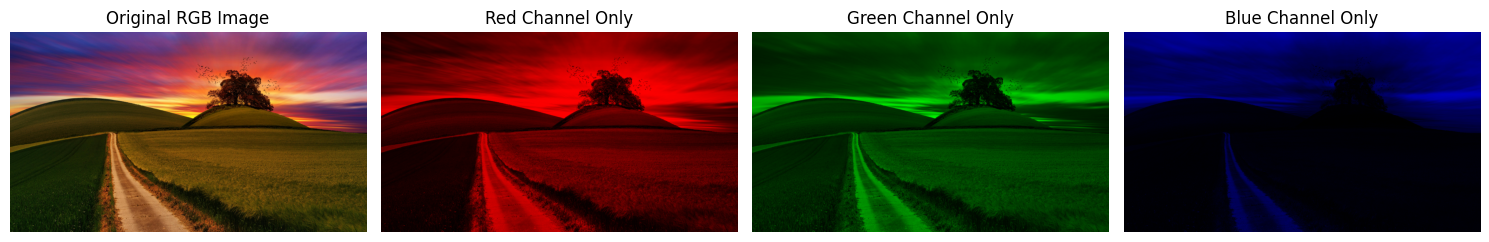

In [5]:
# Individual color channels
imageR   = imageRGB[:, :, 0]    # Red channel
imageG   = imageRGB[:, :, 1]    # Green channel
imageB   = imageRGB[:, :, 2]    # Blue channel

# Channels as grayscale images
plt.figure(figsize=(15, 10)) # figsize = (width, height)

plt.subplot(1, 4, 1)         # first subplot in a 1x4 grid
plt.imshow(imageRGB)
plt.title('Original RGB Image')
plt.axis('off')              # we need to turn off the axis because default it shows ticks and values

plt.subplot(1, 4, 2)
plt.imshow(imageR, cmap='gray')
plt.title('Red Channel (grayscale)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(imageG, cmap='gray') # cmap can take values of 'gray', 'viridis', 'hot', etc. 
plt.title('Green Channel (grayscale)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(imageB, cmap='gray')
plt.title('Blue Channel (grayscale)')
plt.axis('off')

plt.tight_layout() # this makes sure that the titles and images do not overlap
plt.show() 

############################################################################################

############################################################################################

# Channels in their respective colors
plt.figure(figsize=(15, 10))

# Create colored versions by setting other channels to zero
red_only = imageRGB.copy() 
red_only[:, :, 1] = 0  # Remove green
red_only[:, :, 2] = 0  # Remove blue

green_only = imageRGB.copy()
green_only[:, :, 0] = 0  # Remove red
green_only[:, :, 2] = 0  # Remove blue

blue_only = imageRGB.copy()
blue_only[:, :, 0] = 0  # Remove red
blue_only[:, :, 1] = 0  # Remove green

plt.subplot(1, 4, 1)
plt.imshow(imageRGB)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(red_only)
plt.title('Red Channel Only')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(green_only)
plt.title('Green Channel Only')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(blue_only)
plt.title('Blue Channel Only')
plt.axis('off')

plt.tight_layout()
plt.show()

# BGR to RGB

[Opencv](https://opencv.org/) is a popular Computer Vision Library, usable in many languages (C++, python...).

It offers `cv.cvtColor` to perform color conversions, which transform independently all pixel values from one color representation to another.

For instance, its option `cv.COLOR_BGR2RGB` may be used to convert from BGR to RGB channel order.
More simply, it swaps the red and blue color channels.

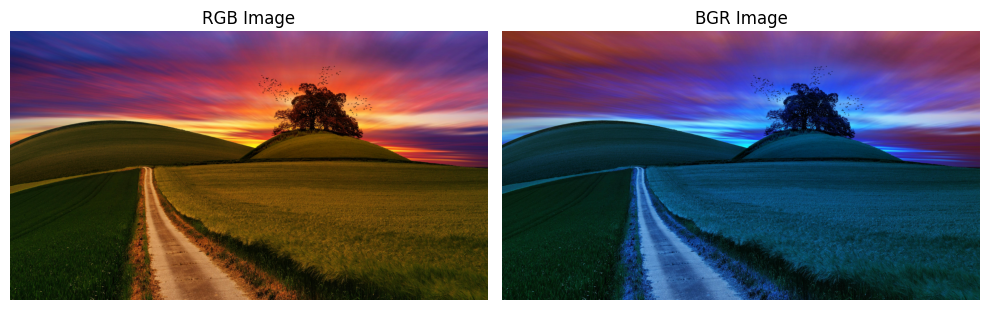

In [6]:
imageBGR = cv.cvtColor(imageRGB, cv.COLOR_BGR2RGB) # convert RGB to BGR

# Both images side by side for comparison
plt.figure(figsize=(10, 5)) # figsize = (width, height)

plt.subplot(1, 2, 1)
plt.imshow(imageRGB)
plt.title('RGB Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(imageBGR)
plt.title('BGR Image')
plt.axis('off')

plt.tight_layout()
plt.show()

Reimplement the RGB to BGR conversion without using opencv, manipulating numpy arrays directly.

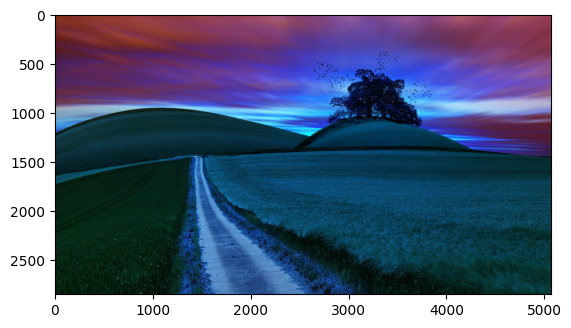

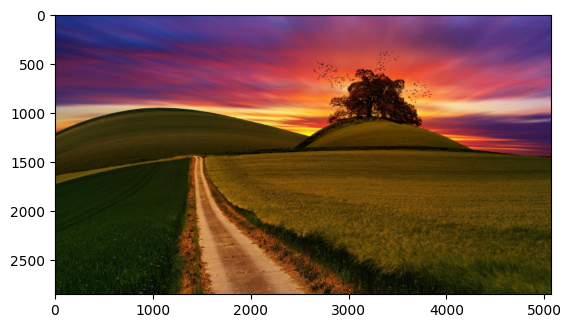

In [7]:
def rgb2bgr(image): 
    return image[:,:, ::-1]  
    # YOUR CODE HERE
imshow(rgb2bgr(imageRGB))
imshow(rgb2bgr(rgb2bgr(imageRGB)))

Likewise, you can manipulate the image spatially.
Show a flipped image along the X axis.

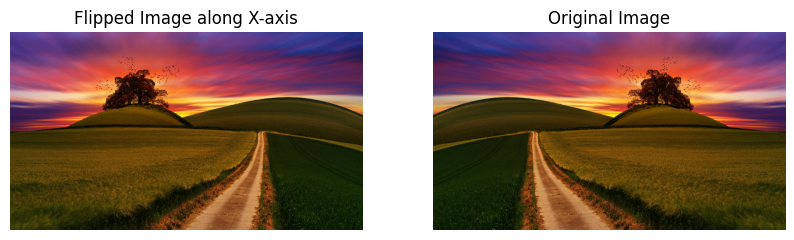

In [8]:
# YOUR CODE HERE
flipped_X= cv.flip(imageRGB, 1) # 1 = along X-axis

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)    
plt.imshow(flipped_X)
plt.title('Flipped Image along X-axis')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imageRGB)
plt.title('Original Image')
plt.axis('off')

plt.show()

And along the Y axis.

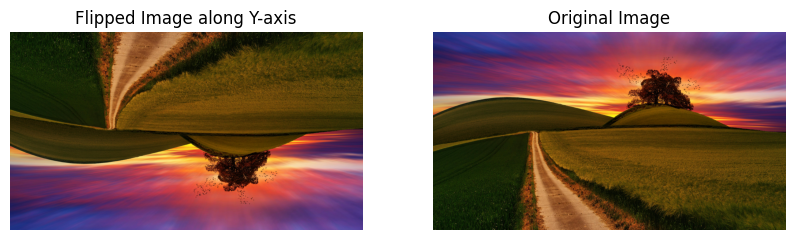

In [9]:
# YOUR CODE HERE
flipped_Y= cv.flip(imageRGB, 0) # 1 = along Y-axis

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)    
plt.imshow(flipped_Y)
plt.title('Flipped Image along Y-axis')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imageRGB)
plt.title('Original Image')
plt.axis('off')

plt.show()

# BGR to gray

Use OpenCV to convert the image to gray

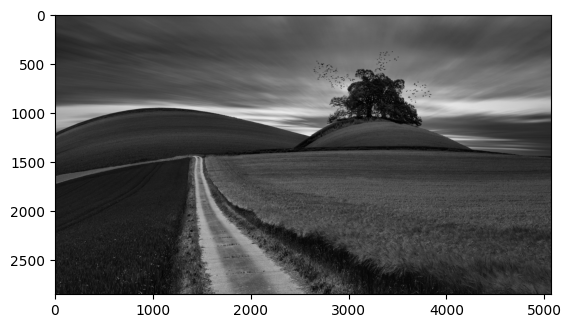

In [10]:
# YOUR CODE HERE
imageGray = cv.cvtColor(imageBGR, cv.COLOR_BGR2GRAY)

imshow(imageGray, cmap='gray')

Let us reimplement this conversion ourselves.

How would you compute a gray level image from a color image ?

The simplest approach is to just average the red, green and blue pixel values.

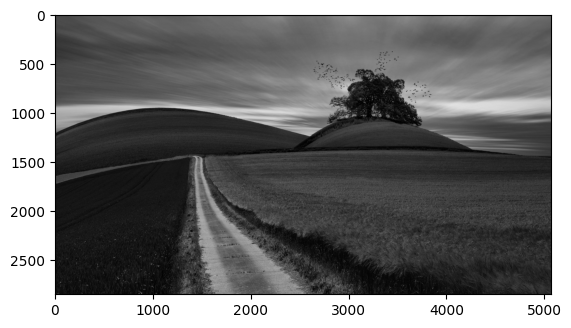

In [11]:
imageGrayMean = np.mean(imageRGB, axis=2).astype(np.uint8)

# YOUR CODE HERE
imshow(imageGrayMean,cmap='gray')

A better approach is based on the human visual system, which is more sensitive to the green channel than the other channels. The standard linear weights are 57.8% green, 29.9% red and 11.4% blue.

hint : use `array.dot`

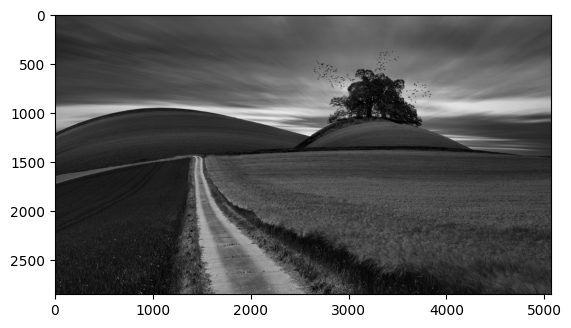

In [12]:
weights = np.array([0.299, 0.587, 0.114])
imageGrayLinear = imageRGB.dot(weights)

# YOUR CODE HERE
imshow(imageGrayLinear,cmap='gray')

# Image gradients

Opencv offers many image processing functions such as the computation of image gradients (cv.Sobel, cf next lecture).

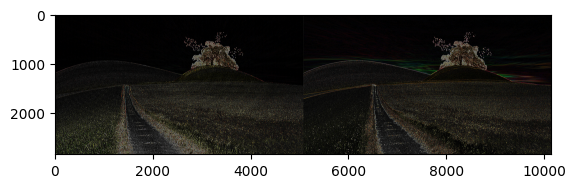

In [13]:
sobelx = cv.Sobel(imageRGB, cv.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
sobely = cv.Sobel(imageRGB, cv.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

# converting to absolute values for display
sobelx = np.absolute(sobelx)
sobely = np.absolute(sobely)

# back to uint8 for display
sobelx = np.uint8(sobelx)
sobely = np.uint8(sobely)

imshow(cv.hconcat((sobelx, sobely)))

Implement simple gradients using a finite difference scheme.

Return the absolute value of the gradients (using np.fabs) to ensure positive values, as imshow and your screen do not handle negative values !

Image type is cast in float (img.astype(float)) as its current type is uint8, which is an unsigned type and will thus yield unexpected results such as 0-1=255 !

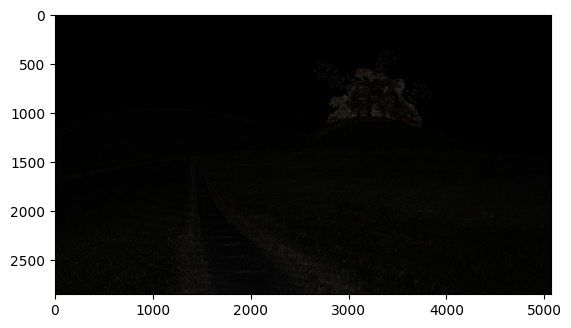

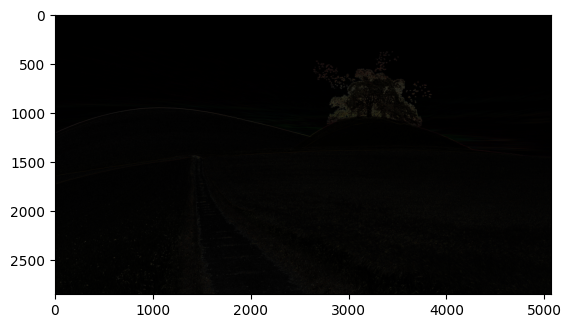

In [14]:
def abs_gradient_x(img):
  imgf = img.astype(float)
  grad_x = imgf - np.roll(imgf, 1, axis=1) #np.roll shifts the array elements and axis=1 means shift along rows (i.e., left/right)
  return np.fabs(grad_x)

def abs_gradient_y(img):
  imgf = img.astype(float)
  grad_y = imgf - np.roll(imgf, 1, axis=0) #np.roll shifts the array elements and axis=0 means shift along columns (i.e., up/down)
  return np.fabs(grad_y)

imshow(abs_gradient_x(imageRGB).astype(np.uint8))
imshow(abs_gradient_y(imageRGB).astype(np.uint8))

# BGR to HSV Conversion

Red Green and Blue values are just one way of defining color coordinates. Many other color spaces exist which are more suitable for image processing, color manipulation, or for defining distances that are closer to the perceptual distances of the Human Visual System.

HSV stands for [Hue, Saturation, and Value ](https://en.wikipedia.org/wiki/HSL_and_HSV).
- Hue is the "color" of the pixel (color wheel red -> magenta -> blue -> cyan -> green -> yellow -> red -> ...), encoded as an angle in degrees
- Saturation measures if the color is vivid (s=1) or grey (s=0)
- Value encodes the perception of brightness of a pixel compared to black



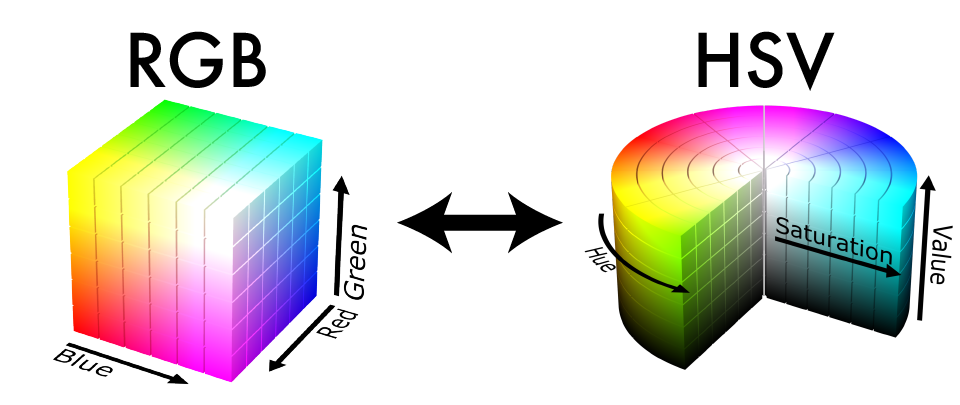

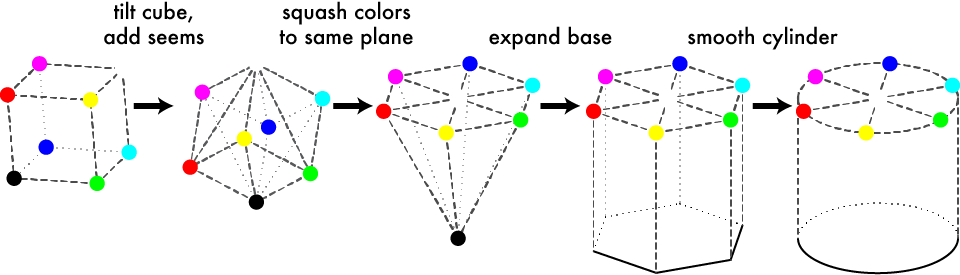

(figure credits : https://github.com/holynski/cse576_sp20_hw1)

OpenCV provides a color conversion from RGB to HSV and details the computation of the H, S, V values in its [documentation](https://docs.opencv.org/4.5.3/de/d25/imgproc_color_conversions.html).

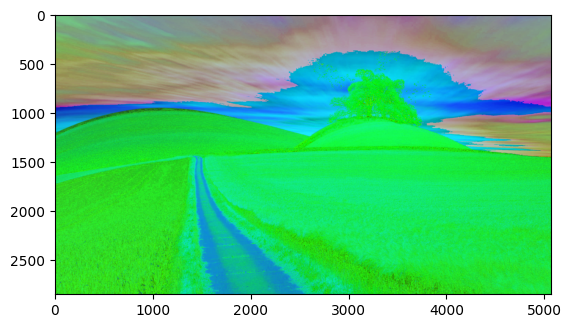

In [15]:
# Convert the RGB image to HSV
imageHSV = cv.cvtColor(imageRGB, cv.COLOR_RGB2HSV)
imshow(imageHSV)

Reimplement the bgr2hsv conversion function.
- Value is simply the maximum of RGB values : `V = max(R,G,B)`
- Saturation is `S = C / V`, where `C = V - m` and `m = min(R,G,B)`. `S` defaults to `0` when `V=0` to prevent a division by 0.
- Hue depends on which channel as the maximal value as documented in the [opencv documentation](https://docs.opencv.org/4.5.3/de/d25/imgproc_color_conversions.html).

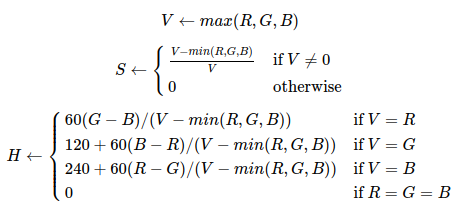

Hints:
- use `np.float32` to work with floating point numbers and export the result using `np.uint8`
- `np.select, np.zeros_like, transpose` may be usefull
- `a[a<0] += 1 ` adds one to all negative entries of a (usefull to ensure H is positive by adding 360 if necessary)
- When computed from uint8 RGB values, HSV value floating point ranges are [0,359]x[0,1]x[0,255]. Please follow opencv convention by casting as uint8 [H/2, 255.S, V], so that it fits in three unsigned bytes ([0,179]x[0,255]x[0,255])

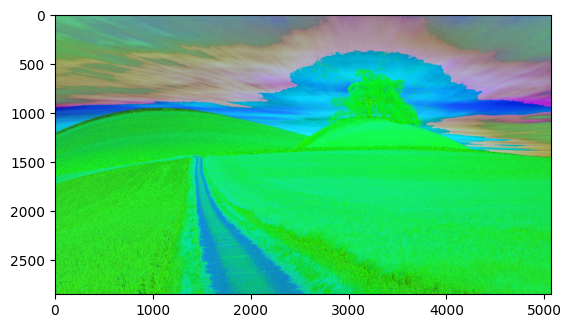

In [16]:
def rgb2hsv(rgb):
  
    rgb = np.float32(rgb) # 
    r, g, b = rgb[..., 0], rgb[..., 1], rgb[..., 2] 
    
    v = np.max(rgb, axis=-1)
    m = np.min(rgb, axis=-1)
    
    c = v - m
    s = np.zeros_like(v)
    # Avoid division by zero for saturation
    s[v != 0] = c[v != 0] / v[v != 0]
    
    h = np.zeros_like(v)
    
    # Hue calculation
    idx = (c != 0) & (v == r)
    h[idx] = 60 * ((g[idx] - b[idx]) / c[idx])
    
    idx = (c != 0) & (v == g)
    h[idx] = 60 * (2 + (b[idx] - r[idx]) / c[idx])
    
    idx = (c != 0) & (v == b)
    h[idx] = 60 * (4 + (r[idx] - b[idx]) / c[idx])
    
    # Ensure hue is in [0, 360]
    h[h < 0] += 360 # h[h < 0] is 
    
    # Convert to OpenCV's uint8 format [0,179]x[0,255]x[0,255]
    hsv_uint8 = np.uint8(np.array([h / 2, s * 255, v])).transpose(1, 2, 0)
    
    return hsv_uint8

imageHSV = rgb2hsv(imageRGB)
imshow(imageHSV)

# HSV to RGB Conversion

you can check your bgr2hsv implementation by using opencv to convert back `imageHSV` to bgr

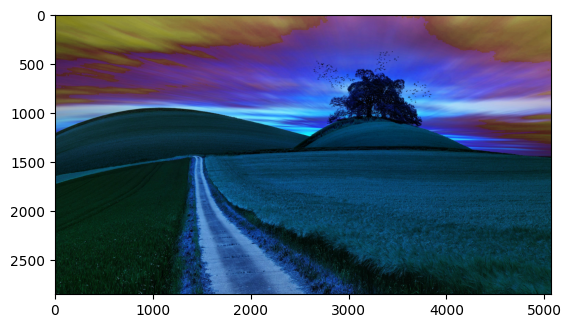

In [17]:
imageBGR_from_HSV = cv.cvtColor(imageHSV, cv.COLOR_HSV2BGR)
imshow(imageBGR_from_HSV)

Here are the formulas for the reverse transform :
- C = V * S
- X = C * (1 - abs(((H / 60) mod 2) - 1))  // use np.fabs and np.fmod which performs a floating point modulo.
- m = V - C
- R = m + R'
- G = m + G'
- B = m + B'    where (R',G',B') is:
 - (C, X, 0) if 0<=H<=60
 - (X, C, 0) if 60<=H<=120
 - (0, C, X) if 120<=H<=180
 - (0, X, C) if 180<=H<=240
 - (X, 0, C) if 240<=H<=300
 - (C, 0, X) if 300<=H<=360

Hint:
- as before, work with floats and export an array of uint8
- `np.floor(h/60)` may help
- convert back H and S to [0,360] and [0,1]

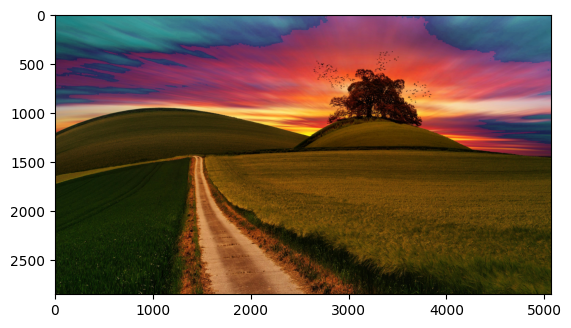

In [18]:
def hsv2rgb(hsv):
  hsv = np.float32(hsv)
  h = hsv[:,:,0] * 2
  s = hsv[:,:,1] / 255
  v = hsv[:,:,2] / 255
  
  c = v * s
  x = c * (1 - np.abs(np.fmod(h / 60.0, 2) - 1))
  m = v - c
  
  rgb_prime = np.zeros_like(hsv)
  
  # 0 <= H < 60
  mask = (h >= 0) & (h < 60)
  rgb_prime[mask] = np.dstack((c[mask], x[mask], np.zeros_like(c[mask])))[0]
  
  
  
  # 60 <= H < 120
  mask = (h >= 60) & (h < 120)
  rgb_prime[mask] = np.dstack((x[mask], c[mask], np.zeros_like(c[mask])))[0]
  
  # 120 <= H < 180
  mask = (h >= 120) & (h < 180)
  rgb_prime[mask] = np.dstack((np.zeros_like(c[mask]), c[mask], x[mask]))[0]
  
  # 180 <= H < 240
  mask = (h >= 180) & (h < 240)
  rgb_prime[mask] = np.dstack((np.zeros_like(c[mask]), x[mask], c[mask]))[0]
  
  # 240 <= H < 300
  mask = (h >= 240) & (h < 300)
  rgb_prime[mask] = np.dstack((x[mask], np.zeros_like(c[mask]), c[mask]))[0]
  # 300 <= H < 360
  mask = (h >= 300) & (h < 360)
  rgb_prime[mask] = np.dstack((c[mask], np.zeros_like(c[mask]), x[mask]))[0]
  rgb = (rgb_prime + m[:,:,np.newaxis]) * 255
  return np.uint8(rgb)

imageRGB2 = hsv2rgb(imageHSV)
imshow(imageRGB2)

# HSV manipulation

Play around with the next 3 functions, that respectively overwrite the hue, saturation and value channels of imageHSV with a constant value given by an interactive slider.

In [19]:
@interact(h = (0,180,1))
def imshow_with_hue(h):
  res = np.copy(imageHSV)
  res[:,:,0] = h
  imshow(hsv2rgb(res))


interactive(children=(IntSlider(value=90, description='h', max=180), Output()), _dom_classes=('widget-interact…

In [20]:
@interact(s = (0,255,1)) # 
def imshow_with_saturation(s):
  res = np.copy(imageHSV)
  res[:,:,1] = s
  imshow(hsv2rgb(res))

interactive(children=(IntSlider(value=127, description='s', max=255), Output()), _dom_classes=('widget-interac…

In [21]:
@interact(v = (0,255,1))
def imshow_with_value(v):
  res = np.copy(imageHSV)
  res[:,:,2] = v
  imshow(hsv2rgb(res))

interactive(children=(IntSlider(value=127, description='v', max=255), Output()), _dom_classes=('widget-interac…

Implement a color shift by rotating the hue by a given amount
hint:
- cast the hue with np.float32, otherwise it is likely to overflow (uint8 may not represent values larger than 255)
- use np.fmod(newhue, 180) to get a value between 0 and 179

In [22]:
@interact(amount = (0,360,1))

def rotate_hue(amount):
  res = np.copy(imageHSV)
  hue = res[:,:,0].astype(np.float32)
  hue = hue + amount / 2
  res[:,:,0] = np.fmod(hue, 180).astype(np.uint8)
  imshow(hsv2rgb(res))

interactive(children=(IntSlider(value=180, description='amount', max=360), Output()), _dom_classes=('widget-in…